# Importing libraries, modules and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split



In [ ]:
url = r"https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
dataset = pd.read_csv(url)  

# Explatory Data Analysis

In [ ]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
#is there any missing value?
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**With the written code, it was checked whether there was a missing value and it was seen that there was no missing value.**

### Data visualization

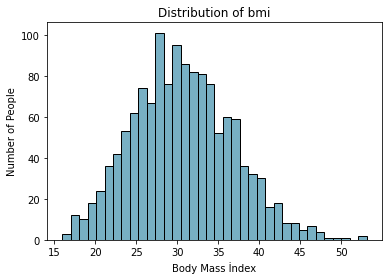

In [ ]:
plt.hist(dataset['bmi'], color = '#78b0c4', edgecolor = 'black',
         bins = int(180/5))

plt.xlabel("Body Mass İndex")
plt.ylabel("Number of People")
plt.title("Distribution of bmi")
plt.show()


**With the analysis made, it was determined that the average body mass index was approximately 30.**

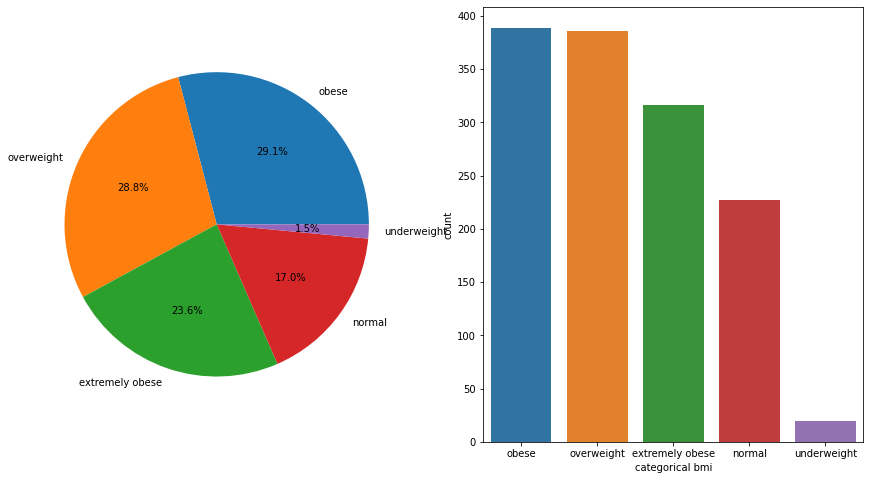

In [ ]:
df_with_bmi = []
for a in list(range(1338)): 
  row = dataset.iloc[a]
  if row.bmi <18.5:
    df_with_bmi.append("underweight")
  elif row.bmi >=18.5 and row.bmi<=25:
    df_with_bmi.append("normal")
  elif row.bmi>25 and row.bmi<=30:
    df_with_bmi.append("overweight")
  elif row.bmi>30 and row.bmi<=35:
    df_with_bmi.append("obese")
  else:
    df_with_bmi.append("extremely obese")

dataset['categorical bmi'] = df_with_bmi
dataset
plt.rcParams["figure.figsize"] = (15,8)

plt.subplot(1,2,1)
plt.pie(dataset['categorical bmi'].value_counts(), labels= dataset['categorical bmi'].value_counts().index, autopct = '%1.1f%%')
plt.subplot(1,2,2)
bmi_count = sns.countplot(x="categorical bmi", data=dataset, order=dataset['categorical bmi'].value_counts().index)

**When the bar chart and pie chart obtained as a result of the analyzes were examined, it was concluded that most people were overweight or obese.**

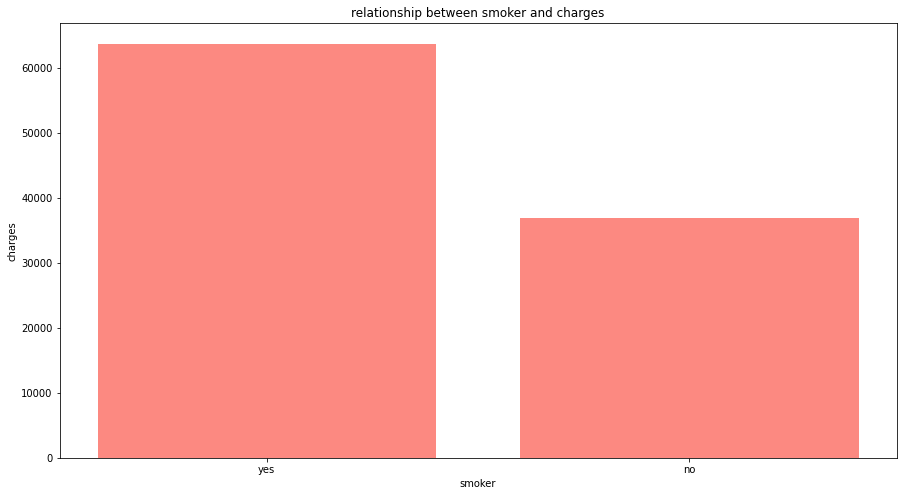

In [ ]:
x = dataset["smoker"]
y = dataset["charges"]
plt.bar(x,y, color="#fc8981")
plt.title("relationship between smoker and charges")
plt.ylabel("charges")
plt.xlabel("smoker")
plt.show()

In [ ]:
#average of smoker 
smoker_charges = dataset[['smoker', 'charges']].groupby(['smoker'], as_index = False).mean().sort_values(by='charges', ascending=False).style.background_gradient(low=0.75, high=1)
smoker_charges

,smoker,charges
1,yes,32050.231832
0,no,8434.268298


In [ ]:
yes = dataset["smoker"][dataset["smoker"]=="yes"].value_counts()
all = dataset["smoker"].value_counts().sum()
percent = (yes/all)*100
percent

yes    20.478326
Name: smoker, dtype: float64

**As a result of the analysis, it was concluded that 20.47% of the people smoked.**

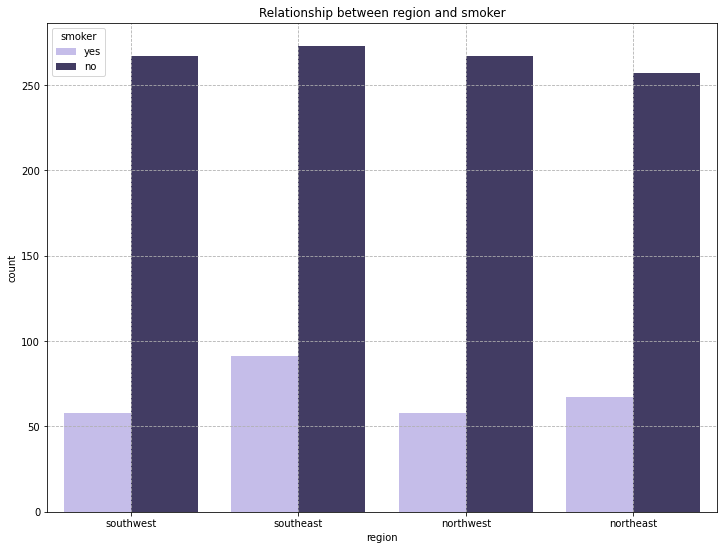

In [ ]:
plt.figure(figsize=(12,9))
sns.countplot(x='region',hue=dataset["smoker"] ,data=dataset,palette=["#c0b6f0", "#3e3569"])
plt.title('Relationship between region and smoker')
plt.grid(which='major',linestyle='--')
plt.show()

**When the bar chart obtained as a result of the analysis was examined, it was seen that the most smoking area was southeast.**

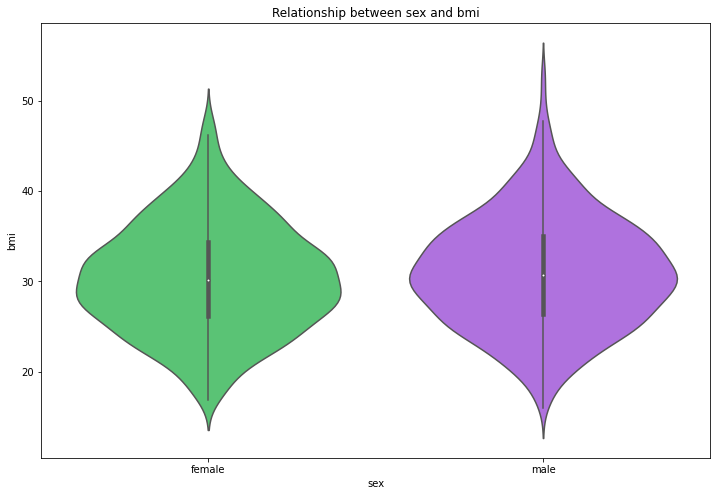

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x=dataset['sex'], y=dataset['bmi'], palette=["#48d46d","#b160f0"])
plt.title("Relationship between sex and bmi")
plt.show()

**Considering the relationship between body mass index and sex, the number of men with a body mass index above 50 is more than the number of women.**

In [ ]:
#calculate number of children for each region

reg_child=dataset[["region","children"]].groupby('region').sum()
print(reg_child)
print(reg_child.columns)


           children
region             
northeast       339
northwest       373
southeast       382
southwest       371
Index(['children'], dtype='object')


<BarContainer object of 4 artists>

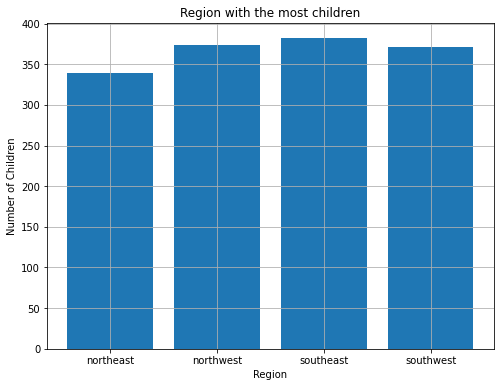

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Region with the most children")
plt.xlabel("Region")
plt.ylabel("Number of Children")
plt.grid()
plt.bar(reg_child.index,reg_child["children"])

**As a result of the analysis, it was seen that the number of children was higher in the southeast region.**

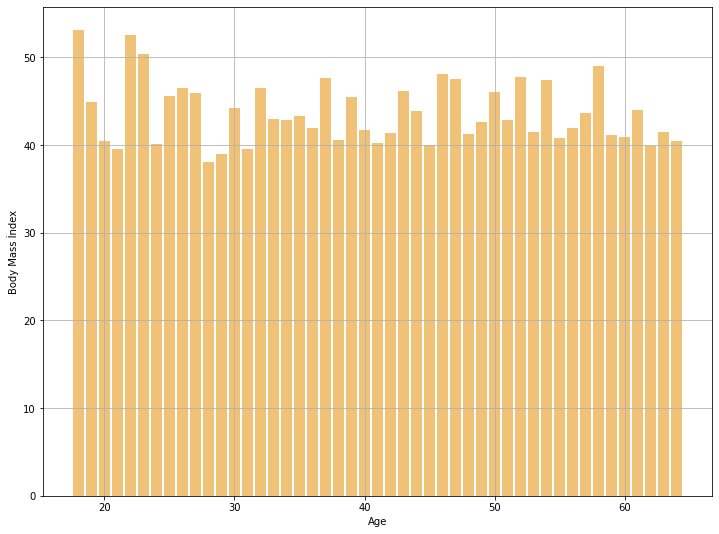

In [ ]:
y= dataset['bmi']
x= dataset["age"]
plt.figure(figsize=(12,9))
plt.bar(x,y, color = "#f0c278")
plt.xlabel("Age")
plt.ylabel("Body Mass İndex")
plt.grid()
plt.show()

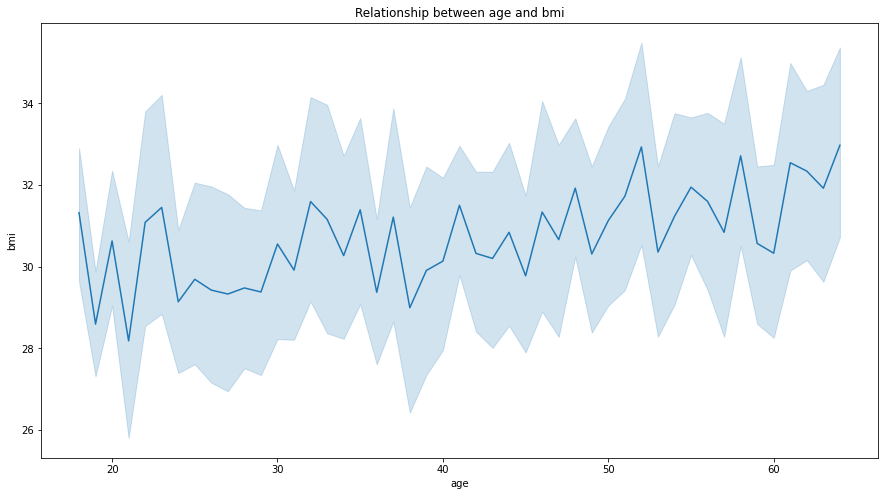

In [ ]:
sns.lineplot(data=dataset, x=dataset["age"], y=dataset["bmi"])
plt.xlabel("age")
plt.ylabel("bmi")
plt.title("Relationship between age and bmi")
sns.set(rc={'figure.figsize':(18,12)})


**When the relationship between body mass index and age is examined, it is seen that the age with the highest body mass index is 18.**

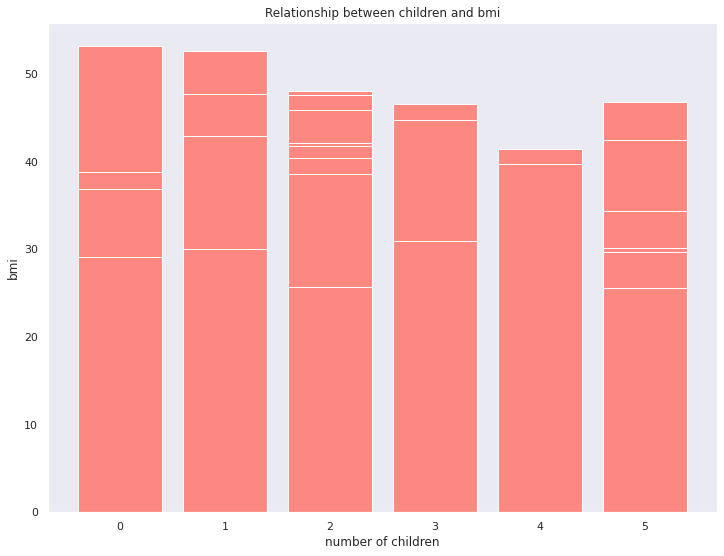

In [ ]:
x = dataset["children"]
y = dataset["bmi"]
plt.figure(figsize=(12,9))
plt.bar(x,y, color="#fc8981")
plt.ylabel("bmi")
plt.xlabel("number of children")
plt.title("Relationship between children and bmi")
plt.grid()
plt.show()

When the bar graph obtained as a result of the analysis made to see the relationship between body mass index and the number of children is examined, it is seen that the body mass index of those who do not have children is higher than those who have children.**kalın metin**

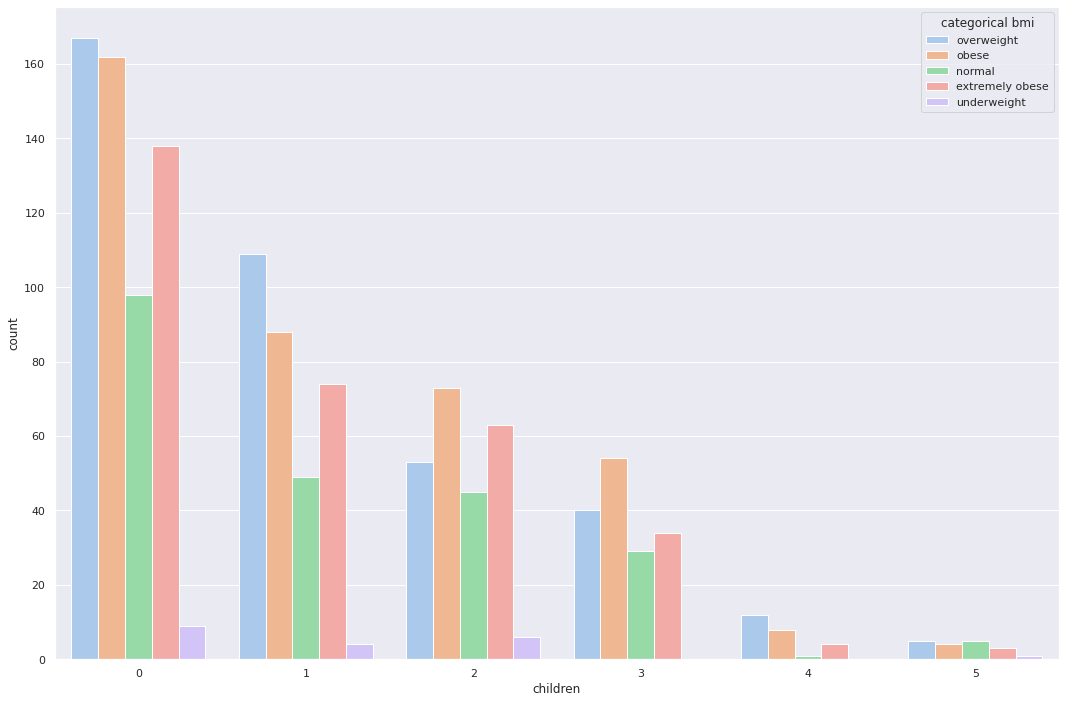

In [ ]:
bmi_children = sns.countplot(x="children", data=dataset, order=dataset['children'].value_counts().index, hue="categorical bmi",palette = "pastel")
bmi_children

In [ ]:
dataset[['children', 'bmi']].groupby(['children'], as_index = False).mean().sort_values(by='bmi', ascending=False).style.background_gradient(low=0.75, high=1)

,children,bmi
4,4,31.391200
2,2,30.978104
3,3,30.684331
1,1,30.623148
0,0,30.550296
5,5,29.605000


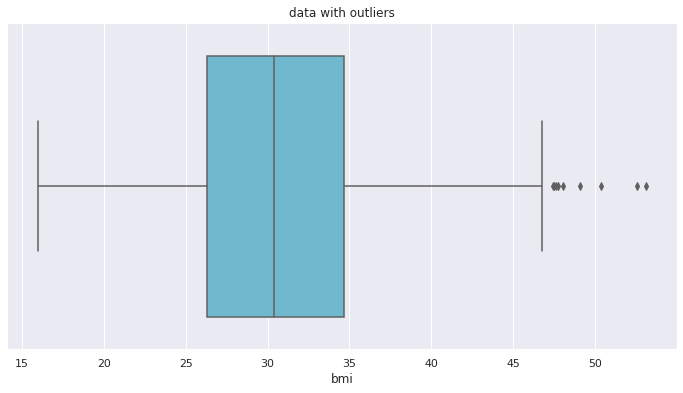

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(dataset['bmi'], color ="#5fc0de")
plt.title('data with outliers')
plt.show()

**The Body Mass Index (bmi) variable has an outlier. It has been determined that a few values after 45 do not generally match the behavior of the dataset.**

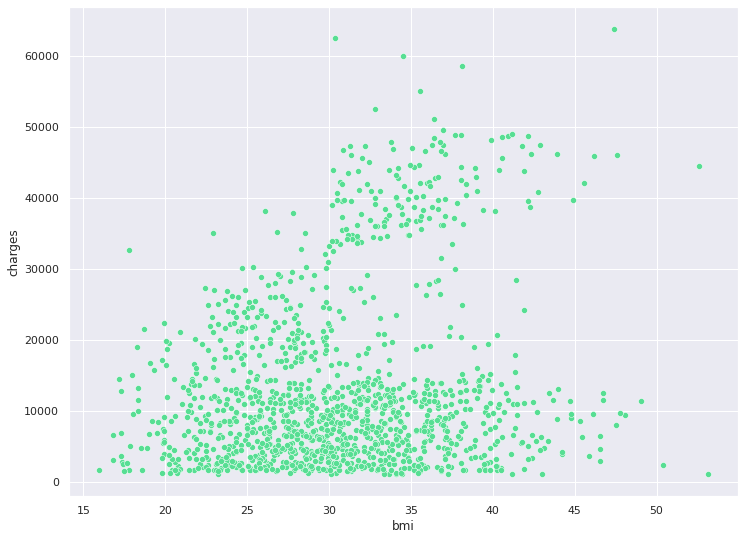

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='bmi',y='charges',data=dataset,color='#57de93')
plt.show()

**As a result of the analysis, it was concluded that the health costs of people whose body mass indexes are between 20-35 are mostly between 0-10000.**

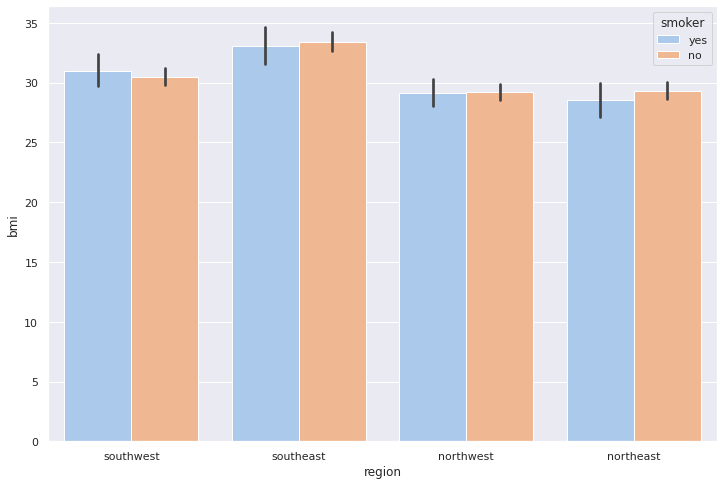

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='bmi', hue='smoker', data=dataset, palette='pastel')

**As a result of the analysis, it was seen that the average bmi of people living in the same region, smoking and non-smokers, was close to each other.**

# Preparation of X and y variable for input and output layers

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [ ]:
dataset

,age,sex,bmi,children,smoker,region,charges,categorical bmi
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,extremely obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [ ]:
#scaling
col_t = MinMaxScaler()
dataset[['age', 'bmi', 'children']] = col_t.fit_transform(dataset[['age', 'bmi', 'children']])
dataset


,age,sex,bmi,children,smoker,region,charges,categorical bmi
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400,overweight
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230,obese
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200,obese
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061,normal
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,northwest,10600.54830,obese
1334,0.000000,female,0.429379,0.0,no,northeast,2205.98080,obese
1335,0.000000,female,0.562012,0.0,no,southeast,1629.83350,extremely obese
1336,0.065217,female,0.264730,0.0,no,southwest,2007.94500,overweight


In [ ]:
one_hot_enc = OneHotEncoder(handle_unknown='ignore')
region =  pd.DataFrame(one_hot_enc.fit_transform(dataset[['region']]).toarray())
one_data = dataset.join(region)
one_data

,age,sex,bmi,children,smoker,region,charges,categorical bmi,0,1,2,3
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400,overweight,0.0,0.0,0.0,1.0
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230,obese,0.0,0.0,1.0,0.0
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200,obese,0.0,0.0,1.0,0.0
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061,normal,0.0,1.0,0.0,0.0
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520,overweight,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,northwest,10600.54830,obese,0.0,1.0,0.0,0.0
1334,0.000000,female,0.429379,0.0,no,northeast,2205.98080,obese,1.0,0.0,0.0,0.0
1335,0.000000,female,0.562012,0.0,no,southeast,1629.83350,extremely obese,0.0,0.0,1.0,0.0
1336,0.065217,female,0.264730,0.0,no,southwest,2007.94500,overweight,0.0,0.0,0.0,1.0


In [ ]:
#Editing the dataframe

In [ ]:
one_data = one_data.drop(columns=["region"])

In [ ]:
one_data.rename(columns = {3:'southwest', 2:'southeast',1:'northwest',0:'northeast'}, inplace = True)
one_data

,age,sex,bmi,children,smoker,charges,categorical bmi,northeast,northwest,southeast,southwest
0,0.021739,female,0.321227,0.0,yes,16884.92400,overweight,0.0,0.0,0.0,1.0
1,0.000000,male,0.479150,0.2,no,1725.55230,obese,0.0,0.0,1.0,0.0
2,0.217391,male,0.458434,0.6,no,4449.46200,obese,0.0,0.0,1.0,0.0
3,0.326087,male,0.181464,0.0,no,21984.47061,normal,0.0,1.0,0.0,0.0
4,0.304348,male,0.347592,0.0,no,3866.85520,overweight,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,10600.54830,obese,0.0,1.0,0.0,0.0
1334,0.000000,female,0.429379,0.0,no,2205.98080,obese,1.0,0.0,0.0,0.0
1335,0.000000,female,0.562012,0.0,no,1629.83350,extremely obese,0.0,0.0,1.0,0.0
1336,0.065217,female,0.264730,0.0,no,2007.94500,overweight,0.0,0.0,0.0,1.0


In [ ]:
one_data.dtypes

age                float64
sex                 object
bmi                float64
children           float64
smoker              object
charges            float64
categorical bmi     object
northeast          float64
northwest          float64
southeast          float64
southwest          float64
dtype: object

In [ ]:
#Label encoding is needed for children, smoke ve sex attributes.
#Converting children datatype to str for label encoding.

one_data['children'] = one_data['children'].astype(str)
one_data.dtypes

age                float64
sex                 object
bmi                float64
children            object
smoker              object
charges            float64
categorical bmi     object
northeast          float64
northwest          float64
southeast          float64
southwest          float64
dtype: object

In [ ]:
objList = one_data.select_dtypes(include = "object").columns
encoder = LabelEncoder()
for i in objList:
    one_data[i] = encoder.fit_transform(one_data[i].astype(str))
one_data

,age,sex,bmi,children,smoker,charges,categorical bmi,northeast,northwest,southeast,southwest
0,0.021739,0,0.321227,0,1,16884.92400,3,0.0,0.0,0.0,1.0
1,0.000000,1,0.479150,1,0,1725.55230,2,0.0,0.0,1.0,0.0
2,0.217391,1,0.458434,3,0,4449.46200,2,0.0,0.0,1.0,0.0
3,0.326087,1,0.181464,0,0,21984.47061,1,0.0,1.0,0.0,0.0
4,0.304348,1,0.347592,0,0,3866.85520,3,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,10600.54830,2,0.0,1.0,0.0,0.0
1334,0.000000,0,0.429379,0,0,2205.98080,2,1.0,0.0,0.0,0.0
1335,0.000000,0,0.562012,0,0,1629.83350,0,0.0,0.0,1.0,0.0
1336,0.065217,0,0.264730,0,0,2007.94500,3,0.0,0.0,0.0,1.0


**In order to increase the accuracy of the model, we find outlier values and remove them from the dataset.**

In [ ]:
sorted_bmi = one_data["bmi"].sort_values()

Q1 = np.percentile(sorted_bmi, 25, interpolation = 'midpoint') 
Q2 = np.percentile(sorted_bmi, 50, interpolation = 'midpoint') 
Q3 = np.percentile(sorted_bmi, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the BMI values is, ', Q1)
print('Q1 50 percentile of the BMI values is, ', Q2)
print('Q1 75 percentile of the BMI values is, ', Q3)




Q1 25 percentile of the BMI values is,  0.27824858757062143
Q1 50 percentile of the BMI values is,  0.38848533763787996
Q1 75 percentile of the BMI values is,  0.5038337368845843


In [ ]:
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

Interquartile range is 0.2255851493139629
low_limit is -0.06012913640032291
up_limit is 0.8422114608555287


In [ ]:
outliers =[]
for x in sorted_bmi:
    if ((x> up_lim) or (x<low_lim)):
         outliers.append(x)
print(' Outliers in the dataset is', outliers)

 Outliers in the dataset is [0.8461124562819478, 0.8490718321226796, 0.8512241054613936, 0.8549905838041432, 0.8638687113263384, 0.8905030938929244, 0.9260156039817058, 0.985203120796341, 1.0]


In [ ]:
final_data = one_data[one_data["bmi"] < 0.8461124562819478]
final_data


,age,sex,bmi,children,smoker,charges,categorical bmi,northeast,northwest,southeast,southwest
0,0.021739,0,0.321227,0,1,16884.92400,3,0.0,0.0,0.0,1.0
1,0.000000,1,0.479150,1,0,1725.55230,2,0.0,0.0,1.0,0.0
2,0.217391,1,0.458434,3,0,4449.46200,2,0.0,0.0,1.0,0.0
3,0.326087,1,0.181464,0,0,21984.47061,1,0.0,1.0,0.0,0.0
4,0.304348,1,0.347592,0,0,3866.85520,3,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,10600.54830,2,0.0,1.0,0.0,0.0
1334,0.000000,0,0.429379,0,0,2205.98080,2,1.0,0.0,0.0,0.0
1335,0.000000,0,0.562012,0,0,1629.83350,0,0.0,0.0,1.0,0.0
1336,0.065217,0,0.264730,0,0,2007.94500,3,0.0,0.0,0.0,1.0


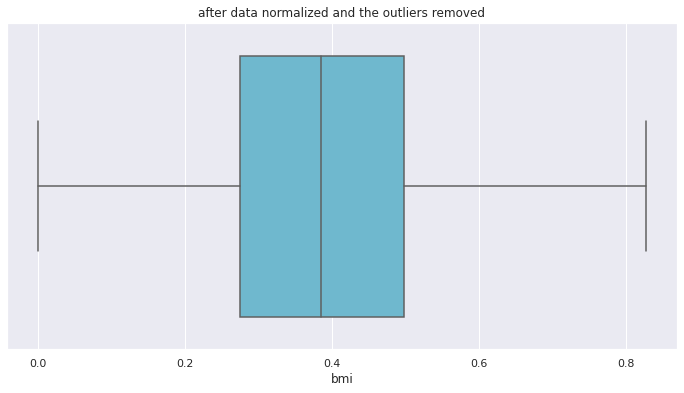

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(final_data['bmi'], color ="#5fc0de")
plt.title('after data normalized and the outliers removed')
plt.show()

# Setting input and output data

In [ ]:
X = final_data.drop(["charges"],axis=1)
y = final_data["charges"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#check dimension and type
print("test-train dimension:",X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim)

print("type of test and train:",type(X_train),type(X_test),type(y_train),type(y_test))

test-train dimension: 2 2 1 1
type of test and train: <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [ ]:
#convert pandas series to dataframe
y_train = y_train.to_frame()
y_test = y_test.to_frame()

### import regression model libary 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.model_selection import cross_val_score

### 1)Linear Regression

In [ ]:
linear_reg = LinearRegression() 
linear_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
linear_score = cross_val_score(linear_reg, X, y, cv=5).mean()

print(linear_score)

0.7461251325111973


In [ ]:
X_train_pred = linear_reg.predict(X_train)
X_test_pred = linear_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
print('MSE:',mean_squared_error(y_train,X_train_pred))
print('MAE:',mean_absolute_error(y_train,X_train_pred))

MSE: 37934655.43022437
MAE: 4207.959764353637


In [ ]:
print('MSE',mean_squared_error(y_test,X_test_pred))
print('MAE',mean_absolute_error(y_test,X_test_pred))

MSE 31339366.889216803
MAE 3795.6033784606


### 2) Decision Tree Regression

In [ ]:
decision_reg = DecisionTreeRegressor(random_state = 0)
decision_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [ ]:
decision_score = cross_val_score(decision_reg, X, y, cv=5).mean()
print(decision_score)

0.6913489224174805


In [ ]:
X_train_pred_decision = decision_reg.predict(X_train)
X_test_pred_decision = decision_reg.predict(X_test)


In [ ]:
print('MSE:',mean_squared_error(y_train,X_train_pred_decision))
print('MAE:',mean_absolute_error(y_train,X_train_pred_decision))

MSE: 196985.07050979164
MAE: 20.582123494623655


In [ ]:
print('MSE',mean_squared_error(y_test,X_test_pred_decision))
print('MAE',mean_absolute_error(y_test,X_test_pred_decision))

MSE 39138040.75093778
MAE 2869.696436303258


### 3) Random Forest Regression

In [ ]:
random_reg = RandomForestRegressor(n_estimators =30, random_state = 0)  # estimator = The number of trees in the forest.
random_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=0)

In [ ]:
random_score = cross_val_score(random_reg, X, y, cv=5).mean()
print(random_score)

0.8298999092438193


In [ ]:
X_train_pred_random = random_reg.predict(X_train)
X_test_pred_random = random_reg.predict(X_test)


In [ ]:
print('MSE:',mean_squared_error(y_train,X_train_pred_random))
print('MAE:',mean_absolute_error(y_train,X_train_pred_random))

MSE: 3738328.163297566
MAE: 1095.12699279316


In [ ]:
print('MSE',mean_squared_error(y_test,X_test_pred_random))
print('MAE',mean_absolute_error(y_test,X_test_pred_random))

MSE 23697881.01781306
MAE 2671.7397953318714


### 4) Adaboost Regression Model

In [ ]:
ada_reg = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada_reg.fit(X_train,y_train)


AdaBoostRegressor(learning_rate=0.01)

In [ ]:
ada_score = cross_val_score(ada_reg, X, y, cv=5).mean()
print(ada_score)


0.8466279139031112


In [ ]:
X_train_pred_ada = ada_reg.predict(X_train)
X_test_pred_ada = ada_reg.predict(X_test)

In [ ]:
print('MSE:',mean_squared_error(y_train,X_train_pred_ada))
print('MAE:',mean_absolute_error(y_train,X_train_pred_ada))

MSE: 21225864.039471388
MAE: 3037.156219416119


In [ ]:
print('MSE',mean_squared_error(y_test,X_test_pred_ada))
print('MAE',mean_absolute_error(y_test,X_test_pred_ada))

MSE 19607760.79201896
MAE 2858.7595058393254


### 5) Gradient Boosting Regression Model

In [ ]:
gradient_boosting_reg = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gradient_boosting_reg.fit(X_train,y_train)


GradientBoostingRegressor(learning_rate=0.2, max_depth=2)

In [ ]:
gradient_boosting_score = cross_val_score(ada_reg, X, y, cv=5).mean()
print(gradient_boosting_score)

0.8471791330200478


In [ ]:
X_train_pred_gra = gradient_boosting_reg.predict(X_train)
X_test_pred_gra = gradient_boosting_reg.predict(X_test)

In [ ]:
print('MSE:',mean_squared_error(y_train,X_train_pred_gra))
print('MAE:',mean_absolute_error(y_train,X_train_pred_gra))

MSE: 15496521.934055455
MAE: 2199.5580680978724


In [ ]:
print('MSE',mean_squared_error(y_test,X_test_pred_gra))
print('MAE',mean_absolute_error(y_test,X_test_pred_gra))

MSE 20682410.658544198
MAE 2523.9030240135135


# Comparing Models

In [ ]:
print('Accuracy linear regression model = '+ str(linear_score))

print('Accuracy decision tree model = '+ str(decision_score))

print('Accuracy of random forest  model = '+ str(random_score))

print('Accuracy  of adaboost model  = '+ str(ada_score))

print('Accuracy  of gradient boosting model  = '+ str(gradient_boosting_score))


Accuracy linear regression model = 0.7461251325111973
Accuracy decision tree model = 0.6913489224174805
Accuracy of random forest  model = 0.8298999092438193
Accuracy  of adaboost model  = 0.8466279139031112
Accuracy  of gradient boosting model  = 0.8471791330200478


# Alternatif Comparison

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits= 10)

In [ ]:
models = []
models.append(LinearRegression())
models.append(DecisionTreeRegressor(random_state=0))
models.append(RandomForestRegressor(n_estimators =30, random_state = 0))
models.append(AdaBoostRegressor(n_estimators=50, learning_rate =.01))
models.append(GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2))

cv_results= {
    "Score": [],
    "MAE": [],
    "MSE": []
}

In [ ]:
from sklearn.model_selection import cross_val_score
for model in models:
  cv_results["Score"].append(cross_val_score(model, X_train, y= y_train, cv = kfold))
  cv_results["MAE"].append(cross_val_score(model, X_train, y= y_train, cv = kfold, scoring="neg_mean_absolute_error"))
  cv_results["MSE"].append(cross_val_score(model, X_train, y= y_train, cv = kfold, scoring="neg_mean_squared_error"))


In [ ]:
cv_means = {
    "Score": [],
    "MAE": [],
    "MSE": []
}
cv_std = {
    "Score": [],
    "MAE": [],
    "MSE": []
}

for metric, results in cv_results.items():
  for arr in results:
    cv_means[metric].append(abs(np.mean(arr)))
    cv_std[metric].append(np.std(arr))


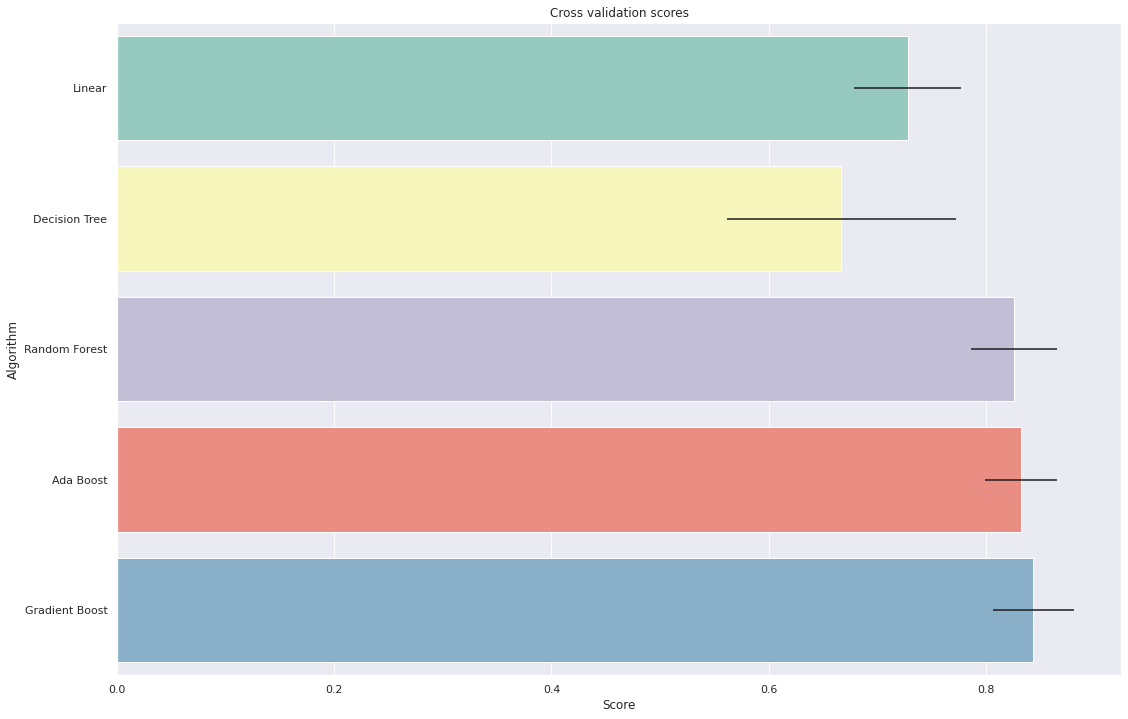

In [ ]:
cv_res_score = pd.DataFrame({"CrossValMeans":cv_means["Score"],"CrossValerrors": cv_std["Score"],"Algorithm":["Linear", "Decision Tree", 
                                                                                      "Random Forest", "Ada Boost", "Gradient Boost"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res_score, palette="Set3",orient = "h",**{'xerr':cv_std["Score"]})
g.set_xlabel("Score")
g = g.set_title("Cross validation scores")

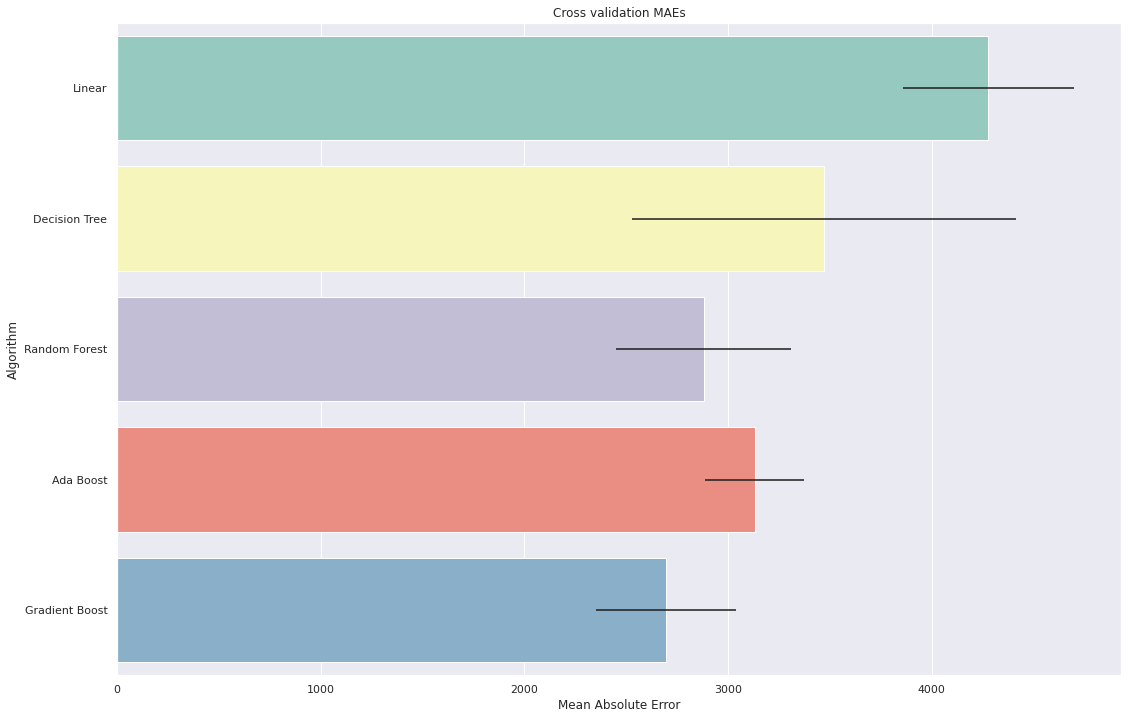

In [ ]:
cv_res_mae = pd.DataFrame({"CrossValMeans":cv_means["MAE"],"CrossValerrors": cv_std["MAE"],"Algorithm":["Linear", "Decision Tree", 
                                                                                      "Random Forest", "Ada Boost", "Gradient Boost"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res_mae, palette="Set3",orient = "h",**{'xerr':cv_std["MAE"]})
g.set_xlabel("Mean Absolute Error")
g = g.set_title("Cross validation MAEs")

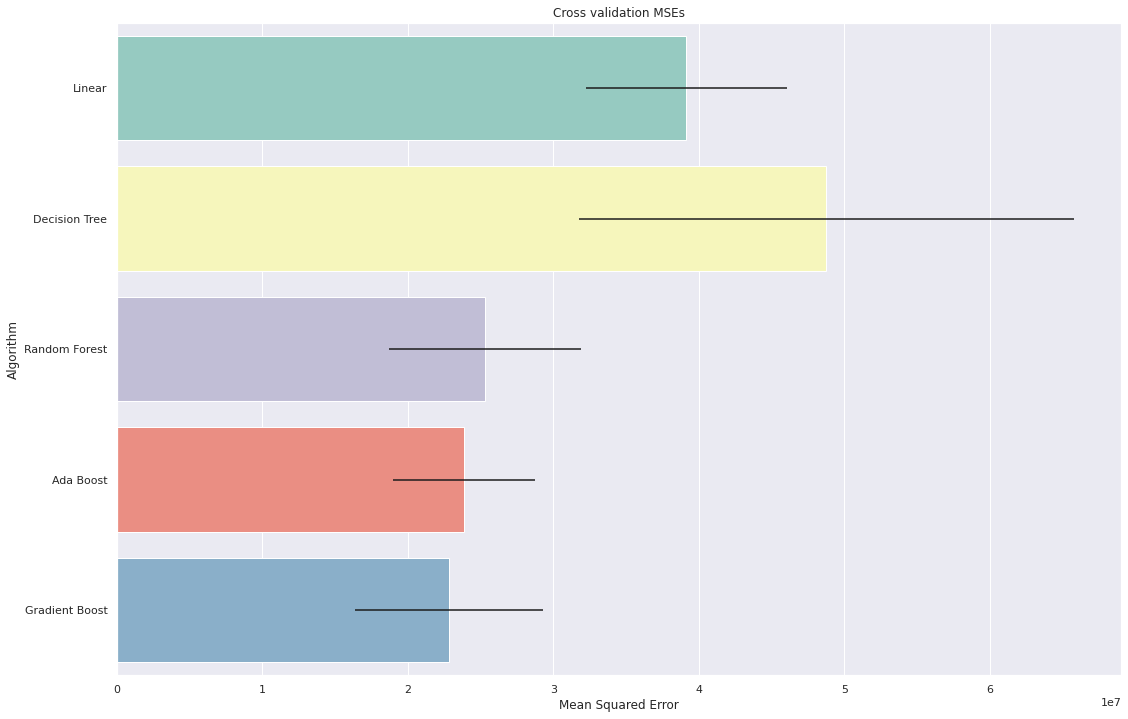

In [ ]:
cv_res_mae = pd.DataFrame({"CrossValMeans":cv_means["MSE"],"CrossValerrors": cv_std["MSE"],"Algorithm":["Linear", "Decision Tree", 
                                                                                      "Random Forest", "Ada Boost", "Gradient Boost"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res_mae, palette="Set3",orient = "h",**{'xerr':cv_std["MSE"]})
g.set_xlabel("Mean Squared Error")
g = g.set_title("Cross validation MSEs")

**We see that the Gradient boost, Ada boost and Random forest regression models give close results. Let's find the best model using Grid Search.**

### Ada Boost Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

gs_ada = GridSearchCV(AdaBoostRegressor(), {
    'n_estimators': [10, 50, 100, 500], 
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0], 
    'loss': ["linear", "square", "exponential"], 
    'random_state': [42]
}, cv = kfold)

gs_ada.fit(X_train, y_train)

df_res_ada = pd.DataFrame(gs_ada.cv_results_)
df_res_ada[['params', 'mean_test_score', 'rank_test_score' ]].sort_values('rank_test_score').head(5)

,params,mean_test_score,rank_test_score
33,"{'learning_rate': 0.01, 'loss': 'exponential',...",0.836966,1
44,"{'learning_rate': 0.1, 'loss': 'exponential', ...",0.835543,2
12,"{'learning_rate': 0.001, 'loss': 'linear', 'n_...",0.834760,3
34,"{'learning_rate': 0.01, 'loss': 'exponential',...",0.834721,4
16,"{'learning_rate': 0.001, 'loss': 'square', 'n_...",0.834650,5


### Gradient Boost Grid Search

In [ ]:
gs_gb = GridSearchCV(GradientBoostingRegressor(), {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0], 
    'criterion': ['friedman_mse', 'squared_error', 'mse'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}, cv = kfold)

gs_gb.fit(X_train, y_train)

df_res_gb = pd.DataFrame(gs_gb.cv_results_)
df_res_gb[['params', 'mean_test_score', 'rank_test_score' ]].sort_values('rank_test_score').head(5)

,params,mean_test_score,rank_test_score
288,"{'criterion': 'squared_error', 'learning_rate'...",0.848621,1
468,"{'criterion': 'mse', 'learning_rate': 0.1, 'lo...",0.848621,1
108,"{'criterion': 'friedman_mse', 'learning_rate':...",0.848621,1
289,"{'criterion': 'squared_error', 'learning_rate'...",0.847673,4
469,"{'criterion': 'mse', 'learning_rate': 0.1, 'lo...",0.847673,4


### Random Forest Grid Search

In [ ]:
gs_rf = GridSearchCV(RandomForestRegressor(), {
    'n_estimators': [10, 50, 100, 500], 
    'criterion': ["squared_error", "absolute_error", "poisson"],
    'random_state': [42]
}, cv = kfold)

gs_rf.fit(X_train, y_train)

df_res_rf = pd.DataFrame(gs_rf.cv_results_)
df_res_rf[['params', 'mean_test_score', 'rank_test_score' ]].sort_values('rank_test_score').head(5)

,params,mean_test_score,rank_test_score
3,"{'criterion': 'squared_error', 'n_estimators':...",0.829806,1
2,"{'criterion': 'squared_error', 'n_estimators':...",0.828229,2
1,"{'criterion': 'squared_error', 'n_estimators':...",0.827384,3
7,"{'criterion': 'absolute_error', 'n_estimators'...",0.824715,4
6,"{'criterion': 'absolute_error', 'n_estimators'...",0.823410,5


# Applying evaluation metrics to best fitting model

**We found that the best model is Gradient Boosting Regressor.**

In [ ]:
df_res_gb[df_res_gb['rank_test_score']==1][['param_loss', 'param_learning_rate', 'param_criterion', 'param_min_samples_split', 'param_min_samples_leaf', 'param_random_state']]


,param_loss,param_learning_rate,param_criterion,param_min_samples_split,param_min_samples_leaf,param_random_state
108,squared_error,0.1,friedman_mse,2,1,42
288,squared_error,0.1,squared_error,2,1,42
468,squared_error,0.1,mse,2,1,42


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

fitting_model = GradientBoostingRegressor(loss= 'squared_error', learning_rate= 0.1, min_samples_split=10, min_samples_leaf=1, random_state=42)
fitting_model.fit(X_train, y_train)
predictions = fitting_model.predict(X_test)

mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
mae= mean_absolute_error(y_test, predictions)

print(f"Model's metrics:\nMean Squared Error: {mse}\nRoot Mean Squared Error: {rmse}\nMean Absolute Error: {mae}")

Model's metrics:
Mean Squared Error: 18454328.006832357
Root Mean Squared Error: 4295.850091289541
Mean Absolute Error: 2370.0663188313206
